# 💡 STRATEGY

Go To Kelly_game folder for additional information  

[Guide backtesting](https://greyhoundanalytics.com/blog/backtestingpy-a-complete-quickstart-guide/)

# Install

In [1]:
# import library
from backtesting import Backtest
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sta
import sys

sys.path.insert(0, 'C:/Users/Salim Hmidi/Documents/ALGO/Kelly_RM/')

import src.data as data

In [2]:
# import strategy
from src.strategy import RsiOscillator

# Variable

In [3]:

date_debut = '2018-01-01'
date_fin = '2021-01-01'

sp500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

tickers = np.array(sp500[0]['Symbol'])

#tickers ='AAL'

strat = [RsiOscillator]


df_training=[]
df_unseen =[]


## Load the prices

In [4]:


#Get the list of symbols
historical=[]
for i in range(10):
    
    data_downloaded = await data.get_historical_price_full_crypto(tickers[i])
    historical.append(data_downloaded['historical'])




## Preprocess the data used in the strategy

In [5]:
# Créez une liste vide pour stocker les DataFrames nettoyés avec les tickers
cleaned_data_with_tickers = []

# Parcourez chaque DataFrame dans la liste 'historical'
for ticker, df in zip(tickers[:len(historical)], historical):
    # Créez un DataFrame à partir des données historiques actuelles
    data = pd.DataFrame(df)

    # Mettez la première lettre des noms de colonnes en majuscule
    data.columns = [x.title() for x in data.columns]

    # Supprimez les colonnes non nécessaires
    data.drop(['Adjclose', 'Unadjustedvolume', 'Change', 'Changepercent', 'Vwap', 'Label', 'Changeovertime'], axis=1, inplace=True)

    # Convertissez la colonne 'Date' en format datetime
    data['Date'] = pd.to_datetime(data['Date'])

    # Définissez la colonne 'Date' comme index
    data.set_index('Date', inplace=True)

    # Inversez l'ordre du DataFrame
    data = data.iloc[::-1]

    # Ajoutez une colonne 'Ticker' avec le ticker actuel
    data['Ticker'] = ticker
    
    # Ajoutez le DataFrame nettoyé à la liste 'cleaned_data_with_tickers'
    cleaned_data_with_tickers.append(data)

duration = (data.index.max() - data.index.min()).days

display(duration)


1824

# Divide Your Data into Two Sets

- **Training Data**: This set is used for training the model and learning the underlying patterns in the data.

- **Unseen Data**: This set, also known as the test or validation data, is held out from the training process.


In [6]:
for df in cleaned_data_with_tickers:
    # Your code for each DataFrame here
    
    split_date = pd.to_datetime(df.index[0]) + pd.DateOffset(years=3)
    df_training.append(df[df.index < split_date])
    df_unseen.append(df[df.index >= split_date])
    


# Training and Optimizing Backtest Parameters

1. Define the parameter space by listing the variables to optimize, such as indicators or thresholds, along with their potential values.

2. Conduct backtests using different parameter combinations and evaluate performance using metrics like total return, Sharpe ratio, maximum drawdown, and win rate.

3. Perform parameter optimization by identifying the parameter values that yield the best results using techniques like grid search or genetic algorithms.


In [7]:
heatmaps = []


for data in df_training:
        bt = Backtest(data, strat[0], cash=10_000, commission=.002)
        
        stats, heatmap = bt.optimize(
                upper_bound = range(35,85,5),
                lower_bound = range(15,60,5),
                rsi_window = range(10,30,5),
                maximize='Equity Final [$]',
                return_heatmap=True)

        # choose your colormaps from here
        # https://matplotlib.org/stable/tutorials/colors/colormaps.html

        hm = heatmap.groupby(["upper_bound","lower_bound"]).mean().unstack()

        heatmaps.append(heatmap)  # Append each heatmap to the list



c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\Salim Hmidi\ANAconda\lib\site-package

  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\_stats.py:122: RuntimeWarning: divide by zero encountered in scalar divide
  s.loc['Sortino Ratio'] = np.clip((annualized_return - risk_free_rate) / (np.sqrt(np.mean(day_returns.clip(-np.inf, 0)**2)) * np.sqrt(annual_trading_days)), 0, np.inf)  # noqa: E501
c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

c:\Users\Salim Hmidi\ANAconda\lib\site-packages\backtesting\backtesting.py:1488: UserWarning: Searching for best of 360 configurations.
  output = _optimize_grid()


  0%|          | 0/12 [00:00<?, ?it/s]

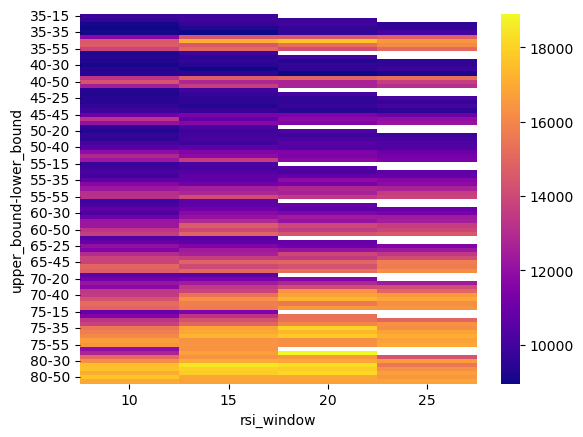

In [8]:

combined_heatmap = pd.concat(heatmaps, axis=0)

# Step 2: Group and aggregate the data (you can choose your aggregation method, e.g., mean)
agg_heatmap = combined_heatmap.groupby(["upper_bound", "lower_bound", "rsi_window"]).mean().unstack()

# Step 3: Create a heatmap from the aggregated data
sns.heatmap(agg_heatmap, cmap="plasma")
plt.show()



# Estimating Odds of Win, Loss, and Gain













In [9]:
df_result = []

for data in df_training:
    bt = Backtest(data, strat[0], cash=10_000, commission=0.002)
    stats = bt.run()
    
    # Create a dictionary to store both trade statistics and ticker
    result_dict = {
        'Stats': stats['_trades'],
        'Ticker': data['Ticker'][0]  # Assuming 'Ticker' is a constant for each DataFrame
    }
    
    df_result.append(result_dict)

# Now you can access the 'Stats' field from the first entry in the list
nbr_trade = len(df_result[0]['Stats'])
nbr_trade 

3

In [10]:


# Initialize a DataFrame to store statistics by ticker
stats_df = pd.DataFrame()

# Loop through df_result to calculate and store statistics by ticker
for result in df_result:
    trades = result['Stats']
    ticker = result['Ticker']

    # Calculate win_probability, win_size, and loss_size for each trade
    trades['Win_Probability'] = (trades['ReturnPct'] > 0).astype(int)  # 1 for win, 0 for loss
    trades['Win_Size'] = np.where(trades['Win_Probability'] == 1, trades['ReturnPct'], 0)
    trades['Loss_Size'] = np.where(trades['Win_Probability'] == 0, -trades['ReturnPct'], 0)

    # Append the current ticker to the DataFrame
    trades['Ticker'] = ticker
    trades['Number_of_Trade'] = len(trades)
    # Append the statistics for the current ticker to the DataFrame
    stats_df = stats_df.append(trades)

# Calculate the expected win rate (probability)
expected_win_rate = 0.5  # You can change this to your desired value

# Group by ticker and calculate mean and variance
ticker_stats = stats_df.groupby('Ticker').agg(
    Mean_Win_Probability=pd.NamedAgg(column='Win_Probability', aggfunc='mean'),
    Mean_Win_Size=pd.NamedAgg(column='Win_Size', aggfunc='mean'),
    Variance_Win_Size=pd.NamedAgg(column='Win_Size', aggfunc='var'),
    Mean_Loss_Size=pd.NamedAgg(column='Loss_Size', aggfunc='mean'),
    Variance_Loss_Size=pd.NamedAgg(column='Loss_Size', aggfunc='var'),
    Number_of_Trade=pd.NamedAgg(column='Number_of_Trade', aggfunc='mean')
)

# Calculate p-values for Variance_Win_Probability using the binomial test
p_values = []
for ticker in ticker_stats.index:
    observed_mean = ticker_stats.loc[ticker, 'Mean_Win_Probability']
    num_trades = ticker_stats.loc[ticker, 'Number_of_Trade']
    p_value = sta.binom_test(observed_mean * num_trades, num_trades, p=expected_win_rate, alternative='two-sided')
    p_values.append(p_value)

# Add the p-values to the DataFrame
ticker_stats['Win_Probability_P_Value'] = p_values

# Print the updated results


display(ticker_stats)

C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\611267530.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\611267530.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\611267530.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\611267530.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData

,Mean_Win_Probability,Mean_Win_Size,Variance_Win_Size,Mean_Loss_Size,Variance_Loss_Size,Number_of_Trade,Win_Probability_P_Value
Ticker,,,,,,,
ABBV,1.000000,0.171556,0.019638,0.000000,0.000000,5.0,0.0625
ABT,1.000000,0.148446,0.002414,0.000000,0.000000,5.0,0.0625
ACN,1.000000,0.091091,0.006230,0.000000,0.000000,2.0,0.5000
ADBE,1.000000,0.118637,0.003851,0.000000,0.000000,3.0,0.2500
ADM,0.666667,0.041153,0.001597,0.019614,0.001154,3.0,1.0000
ADP,1.000000,0.100957,0.003122,0.000000,0.000000,4.0,0.1250
AES,0.600000,0.065764,0.006792,0.020739,0.000939,5.0,1.0000
AFL,0.666667,0.035584,0.001733,0.073701,0.016295,3.0,1.0000
AOS,1.000000,0.129508,0.008607,0.000000,0.000000,4.0,0.1250


# Filtering Tickers with Inconsistent Results


1. Set a consistency threshold for each metric.

2. Filter out tickers that fail to meet the consistency threshold.

3. Review and refine the remaining tickers based on additional criteria or preferences.


In [11]:

ecart_type_max_gain = -1 #0.3
ecart_type_max_loss = -1 #0.01
p_value_odd = -1 # 0.3


ticker_stats=ticker_stats[ticker_stats.Win_Probability_P_Value >p_value_odd]
ticker_stats=ticker_stats[ticker_stats.Variance_Win_Size > ecart_type_max_gain]
ticker_stats=ticker_stats[ticker_stats.Variance_Loss_Size > ecart_type_max_loss]

display(ticker_stats)

,Mean_Win_Probability,Mean_Win_Size,Variance_Win_Size,Mean_Loss_Size,Variance_Loss_Size,Number_of_Trade,Win_Probability_P_Value
Ticker,,,,,,,
ABBV,1.000000,0.171556,0.019638,0.000000,0.000000,5.0,0.0625
ABT,1.000000,0.148446,0.002414,0.000000,0.000000,5.0,0.0625
ACN,1.000000,0.091091,0.006230,0.000000,0.000000,2.0,0.5000
ADBE,1.000000,0.118637,0.003851,0.000000,0.000000,3.0,0.2500
ADM,0.666667,0.041153,0.001597,0.019614,0.001154,3.0,1.0000
ADP,1.000000,0.100957,0.003122,0.000000,0.000000,4.0,0.1250
AES,0.600000,0.065764,0.006792,0.020739,0.000939,5.0,1.0000
AFL,0.666667,0.035584,0.001733,0.073701,0.016295,3.0,1.0000
AOS,1.000000,0.129508,0.008607,0.000000,0.000000,4.0,0.1250


# Comparing with Unseen Data


1. Compare strategy performance on the test set with backtest results.

2. Analyze deviations and identify contributing factors.(COVID 19)

3. Filter inconsistent Results



In [12]:
df_result = []

for data in df_unseen:
    bt = Backtest(data, strat[0], cash=10_000, commission=0.002)
    stats = bt.run()
    
    # Create a dictionary to store both trade statistics and ticker
    result_dict = {
        'Stats': stats['_trades'],
        'Ticker': data['Ticker'][0]  # Assuming 'Ticker' is a constant for each DataFrame
    }
    
    df_result.append(result_dict)

# Now you can access the 'Stats' field from the first entry in the list
trades = df_result[0]['Stats']


In [13]:

# Initialize a DataFrame to store statistics by ticker
stats_df = pd.DataFrame()

# Loop through df_result to calculate and store statistics by ticker
for result in df_result:
    trades = result['Stats']
    ticker = result['Ticker']

    # Calculate win_probability, win_size, and loss_size for each trade
    trades['Win_Probability'] = (trades['ReturnPct'] > 0).astype(int)  # 1 for win, 0 for loss
    trades['Win_Size'] = np.where(trades['Win_Probability'] == 1, trades['ReturnPct'], 0)
    trades['Loss_Size'] = np.where(trades['Win_Probability'] == 0, -trades['ReturnPct'], 0)

    # Append the current ticker to the DataFrame
    trades['Ticker'] = ticker
    trades['Number_of_Trade'] = len(trades)
    # Append the statistics for the current ticker to the DataFrame
    stats_df = stats_df.append(trades)

# Calculate the expected win rate (probability)
expected_win_rate = 0.5  # You can change this to your desired value

# Group by ticker and calculate mean and variance
ticker_stats_unseen = stats_df.groupby('Ticker').agg(
    Mean_Win_Probability=pd.NamedAgg(column='Win_Probability', aggfunc='mean'),
    Mean_Win_Size=pd.NamedAgg(column='Win_Size', aggfunc='mean'),
    Variance_Win_Size=pd.NamedAgg(column='Win_Size', aggfunc='var'),
    Mean_Loss_Size=pd.NamedAgg(column='Loss_Size', aggfunc='mean'),
    Variance_Loss_Size=pd.NamedAgg(column='Loss_Size', aggfunc='var'),
    Number_of_Trade=pd.NamedAgg(column='Number_of_Trade', aggfunc='mean')
)

# Calculate p-values for Variance_Win_Probability using the binomial test
p_values = []
for ticker in ticker_stats_unseen.index:
    observed_mean = ticker_stats_unseen.loc[ticker, 'Mean_Win_Probability']
    num_trades = ticker_stats.loc[ticker, 'Number_of_Trade']
    p_value = sta.binom_test(observed_mean * num_trades, num_trades, p=expected_win_rate, alternative='two-sided')
    p_values.append(p_value)

# Add the p-values to the DataFrame
ticker_stats_unseen['Win_Probability_P_Value'] = p_values

# Print the updated results
display(ticker_stats)

C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\2292116884.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\2292116884.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\2292116884.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\2292116884.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stats_df = stats_df.append(trades)
C:\Users\Salim Hmidi\App

,Mean_Win_Probability,Mean_Win_Size,Variance_Win_Size,Mean_Loss_Size,Variance_Loss_Size,Number_of_Trade,Win_Probability_P_Value
Ticker,,,,,,,
ABBV,1.000000,0.171556,0.019638,0.000000,0.000000,5.0,0.0625
ABT,1.000000,0.148446,0.002414,0.000000,0.000000,5.0,0.0625
ACN,1.000000,0.091091,0.006230,0.000000,0.000000,2.0,0.5000
ADBE,1.000000,0.118637,0.003851,0.000000,0.000000,3.0,0.2500
ADM,0.666667,0.041153,0.001597,0.019614,0.001154,3.0,1.0000
ADP,1.000000,0.100957,0.003122,0.000000,0.000000,4.0,0.1250
AES,0.600000,0.065764,0.006792,0.020739,0.000939,5.0,1.0000
AFL,0.666667,0.035584,0.001733,0.073701,0.016295,3.0,1.0000
AOS,1.000000,0.129508,0.008607,0.000000,0.000000,4.0,0.1250


In [14]:



ticker_stats_unseen=ticker_stats_unseen[ticker_stats_unseen.Win_Probability_P_Value >p_value_odd]
ticker_stats_unseen=ticker_stats_unseen[ticker_stats_unseen.Variance_Win_Size > ecart_type_max_gain]
ticker_stats_unseen=ticker_stats_unseen[ticker_stats_unseen.Variance_Loss_Size > ecart_type_max_loss]

display(ticker_stats_unseen)

,Mean_Win_Probability,Mean_Win_Size,Variance_Win_Size,Mean_Loss_Size,Variance_Loss_Size,Number_of_Trade,Win_Probability_P_Value
Ticker,,,,,,,
ABBV,0.666667,0.049767,0.006778,0.006128,0.000113,3.0,1.00
ABT,0.666667,0.045093,0.003512,0.038722,0.004498,3.0,1.00
ACN,0.500000,0.078588,0.012352,0.048268,0.004660,2.0,1.00
ADBE,0.500000,0.166235,0.055268,0.140315,0.039377,2.0,1.00
ADM,0.750000,0.050924,0.007830,0.012520,0.000627,4.0,1.00
ADP,0.500000,0.018481,0.000683,0.014984,0.000449,2.0,1.00
AES,0.500000,0.071155,0.010126,0.130854,0.034246,2.0,1.00
AFL,1.000000,0.066675,0.000834,0.000000,0.000000,3.0,0.25
AOS,0.500000,0.050663,0.005133,0.106277,0.022590,2.0,1.00


In [15]:
# Append 'ticker_stats_unseen' to 'ticker_stats'
ticker_stats = ticker_stats.append(ticker_stats_unseen)

# Filter the 'ticker_stats' DataFrame to keep only tickers that appear twice
filtered_ticker_stats = ticker_stats[ticker_stats.index.isin(ticker_stats.index[ticker_stats.index.duplicated()])]

# Calculate the mean of the filtered DataFrame with sum for 'Number_of_Trade'
average_stats = filtered_ticker_stats.groupby(level=0).agg(
    Mean_Win_Probability=('Mean_Win_Probability', 'mean'),
    Mean_Win_Size=('Mean_Win_Size', 'mean'),
    Variance_Win_Size=('Variance_Win_Size', 'mean'),
    Mean_Loss_Size=('Mean_Loss_Size', 'mean'),
    Variance_Loss_Size=('Variance_Loss_Size', 'mean'),
    Win_Probability_P_Value=('Win_Probability_P_Value', 'mean'),
    Number_of_Trade=('Number_of_Trade', 'sum')
)

# Print the average statistics
average_stats_df = pd.DataFrame(average_stats)

# Print or use 'average_stats_df' as needed
display(average_stats_df)


C:\Users\Salim Hmidi\AppData\Local\Temp\ipykernel_12340\3330132594.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ticker_stats = ticker_stats.append(ticker_stats_unseen)


,Mean_Win_Probability,Mean_Win_Size,Variance_Win_Size,Mean_Loss_Size,Variance_Loss_Size,Win_Probability_P_Value,Number_of_Trade
Ticker,,,,,,,
ABBV,0.833333,0.110662,0.013208,0.003064,0.000056,0.53125,8.0
ABT,0.833333,0.096769,0.002963,0.019361,0.002249,0.53125,8.0
ACN,0.750000,0.084840,0.009291,0.024134,0.002330,0.75000,4.0
ADBE,0.750000,0.142436,0.029560,0.070158,0.019688,0.62500,5.0
ADM,0.708333,0.046038,0.004713,0.016067,0.000891,1.00000,7.0
ADP,0.750000,0.059719,0.001902,0.007492,0.000225,0.56250,6.0
AES,0.550000,0.068460,0.008459,0.075797,0.017592,1.00000,7.0
AFL,0.833333,0.051130,0.001284,0.036850,0.008148,0.62500,6.0
AOS,0.750000,0.090085,0.006870,0.053138,0.011295,0.56250,6.0


# Kelly Criterion

The Kelly Criterion is a risk management strategy used to determine the optimal capital allocation. Here's a simplified guide:

1. Calculate the Kelly Criterion formula:
   f* = (p * b - q) / b

2. Estimate the probabilities of winning (p) and the net odds received upon winning (b).

3. Calculate the optimal allocation using the formula.

4. Assess risk and adjust the allocation if necessary.

5. Monitor and update allocations based on performance and changing conditions.

Note: Consider other factors and seek professional advice for a comprehensive understanding.



In [16]:
from sympy.stats import P, E, variance, Die, Normal
import sympy as sp
from sympy import pi, sqrt

x = sp.symbols('x')

for index, row in average_stats_df.iterrows():
    win_probability = row['Mean_Win_Probability']
    Win_Size = row['Mean_Win_Size']
    
    Loss_Size =row['Mean_Loss_Size'] 
   

    # Define the Gaussian PDF
    

    p = win_probability
    q = 1 - p
    b = Win_Size / Loss_Size

    if win_probability == 1.0:
        kelly_fraction = 1
    elif win_probability == 0.0:
        kelly_fraction = 0
    else:
        
        kelly_fraction = (p * b - q) / b
    
    average_stats_df.at[index, 'Kelly_Fraction'] = kelly_fraction

    initial_investment = 1  # Vous devrez définir votre investissement initial
    #average_stats_df['Growth_Rate'] = (1+kelly_fraction*Win_Size)**p + (1+kelly_fraction*Loss_Size)**q

display(average_stats_df)


,Mean_Win_Probability,Mean_Win_Size,Variance_Win_Size,Mean_Loss_Size,Variance_Loss_Size,Win_Probability_P_Value,Number_of_Trade,Kelly_Fraction
Ticker,,,,,,,,
ABBV,0.833333,0.110662,0.013208,0.003064,0.000056,0.53125,8.0,0.828719
ABT,0.833333,0.096769,0.002963,0.019361,0.002249,0.53125,8.0,0.799988
ACN,0.750000,0.084840,0.009291,0.024134,0.002330,0.75000,4.0,0.678883
ADBE,0.750000,0.142436,0.029560,0.070158,0.019688,0.62500,5.0,0.626861
ADM,0.708333,0.046038,0.004713,0.016067,0.000891,1.00000,7.0,0.606545
ADP,0.750000,0.059719,0.001902,0.007492,0.000225,0.56250,6.0,0.718636
AES,0.550000,0.068460,0.008459,0.075797,0.017592,1.00000,7.0,0.051772
AFL,0.833333,0.051130,0.001284,0.036850,0.008148,0.62500,6.0,0.713212
AOS,0.750000,0.090085,0.006870,0.053138,0.011295,0.56250,6.0,0.602533


ABBV


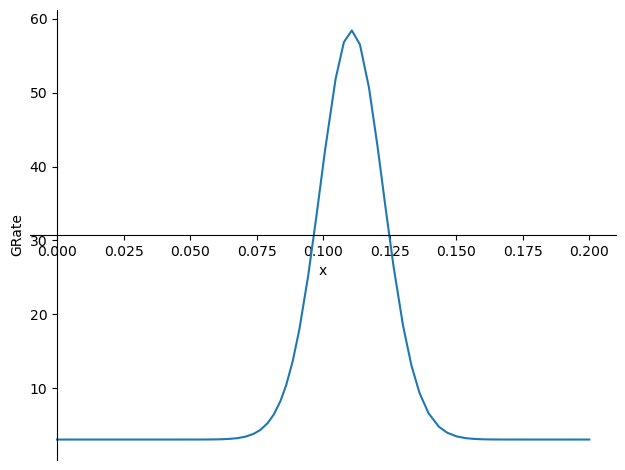

ABT


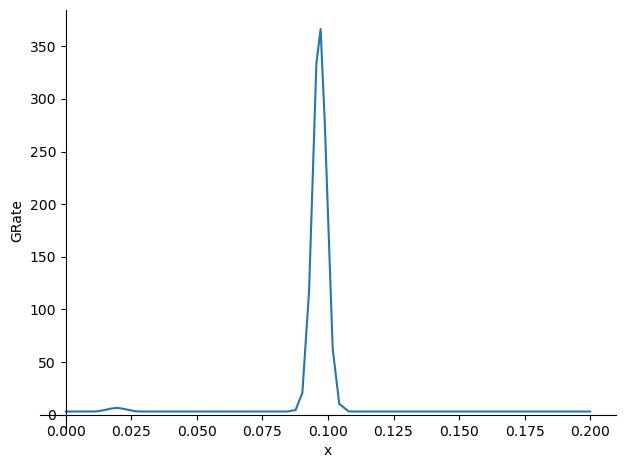

ACN


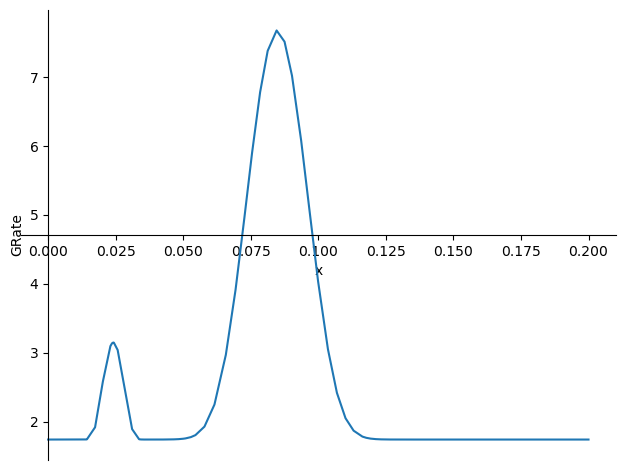

ADBE


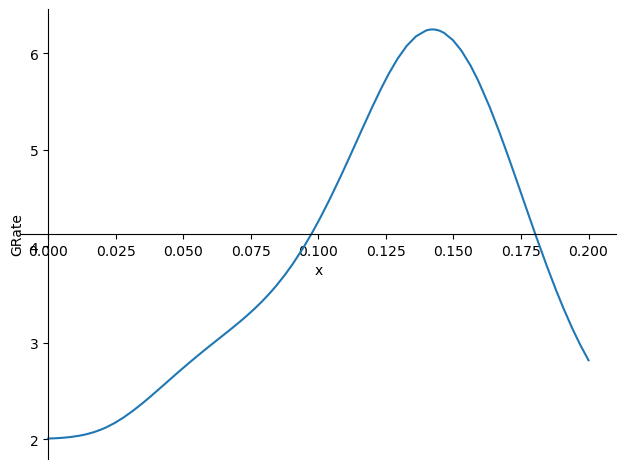

ADM


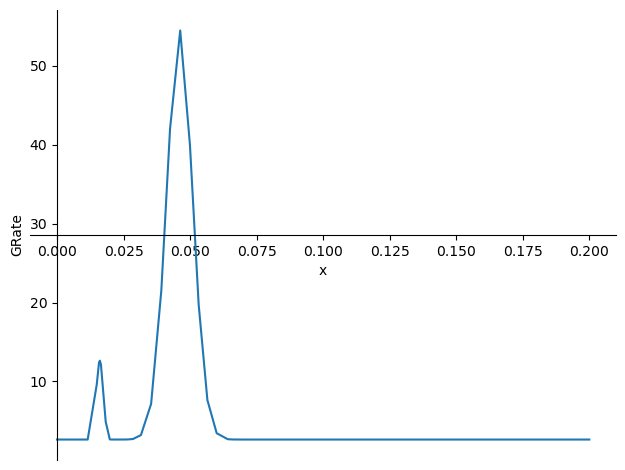

ADP


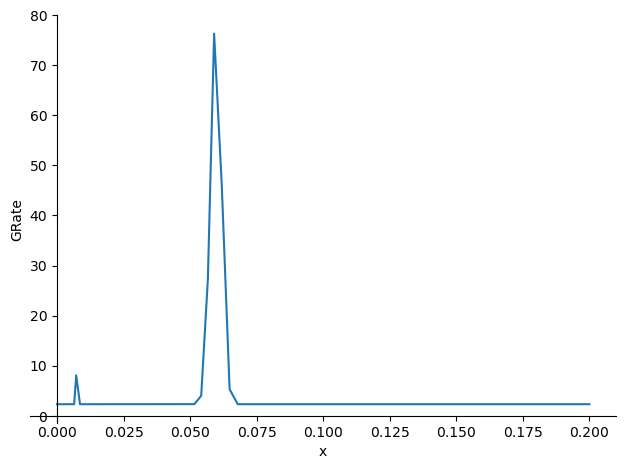

AES


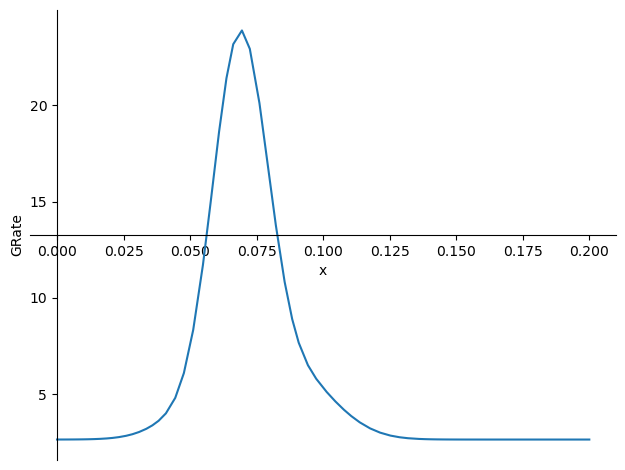

AFL


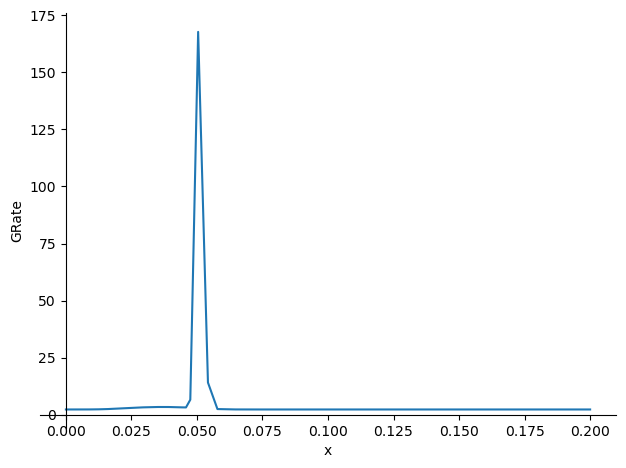

AOS


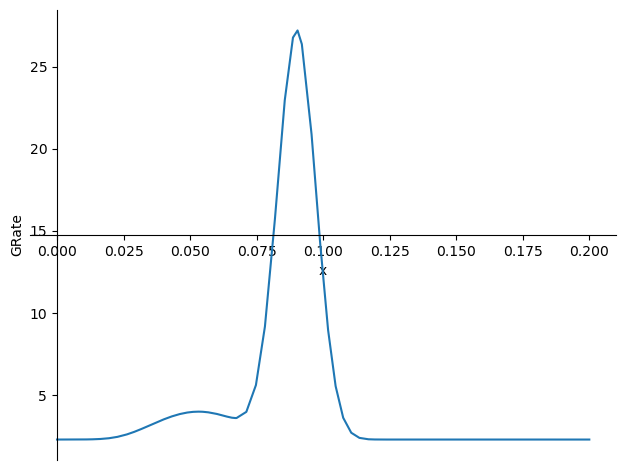

MMM


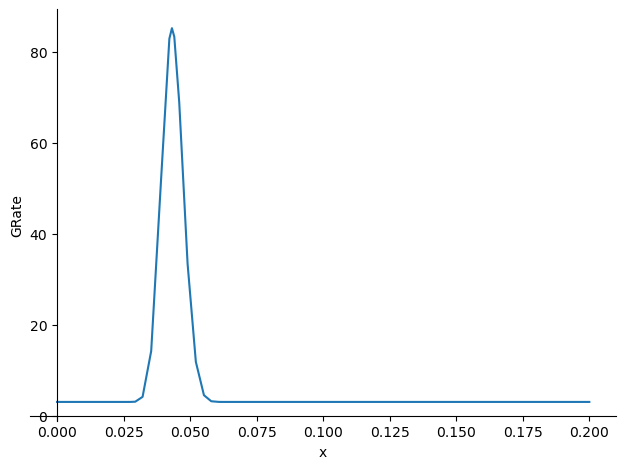

In [47]:

import matplotlib.pyplot as plt
import sympy as sp
from matplotlib.ticker import FuncFormatter

x = sp.symbols('x')



for index, row in average_stats_df.iterrows():
    win_probability = row['Mean_Win_Probability']
    mu_Win_Size =  row['Mean_Win_Size']
    sigma_Win_Size = row['Variance_Win_Size']  # Take the square root of the variance
    mu_Loss_Size = row['Mean_Loss_Size'] 
    sigma_Loss_Size =  row['Variance_Loss_Size'] 
    num_trades=  row['Number_of_Trade'] 
    # Define the Gaussian PDF
    Win_Size = (1 / (sigma_Win_Size * sqrt(2 * pi))) * sp.exp(-(x - mu_Win_Size)**2 / (2 * sigma_Win_Size**2))
    Loss_Size = (1 / (sigma_Loss_Size * sqrt(2 * pi))) * sp.exp(-(x - mu_Loss_Size)**2 / (2 * sigma_Loss_Size**2))

    p = win_probability
    q = 1 - p
    b = Win_Size / Loss_Size

    if win_probability == 1.0:
        kelly_fraction = 1
    elif win_probability == 0.0:
        kelly_fraction = 0
    else:
        
        kelly_fraction = (p * b - q) / b

   

    initial_investment = 1  # Vous devrez définir votre investissement initial

    kelly_fraction =0.6
    GRate = ((1+kelly_fraction*Win_Size)**p + (1+kelly_fraction*Loss_Size)**q)**(num_trades*365/duration)
    print(index)
    
    sp.plot(GRate, (x, 0, 0.2), xlabel='x', ylabel='GRate')



# Aproximate error 